## Plotting for linear and quadratic coefficients from 7 coeff. form of NASA Lewis coeff.
The 7 coefficients forms of temperature dependent of specific heat capacity is approximated to linear and quadratic fit and we will be using Linear fit in our models.

In [3]:
# Required packages
using Polynomials
using Plots;pyplot();
using Plots.PlotMeasures
using LaTeXStrings;
# Linewidths and styles
LW1 = 1.5
LW2 = 2.5
LS1 = :solid
LS2 = :dot
LS3 = :dashdot
LS4 = :dash;

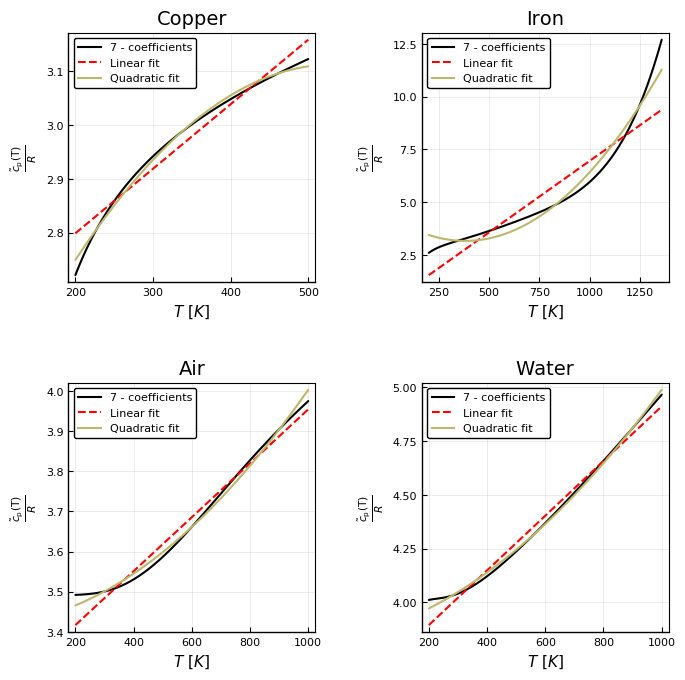

Linear fitting for Copper = Poly(2.559380892459937 + 0.0011982506064166993*x)
Quadratic fitting for Copper = Poly(2.180095589906275 + 0.003506973869188881*x - 3.2981760896745546e-6*x^2)

Linear fitting for Iron = Poly(0.19724545575725203 + 0.00676358006431966*x)
Quadratic fitting for Iron = Poly(4.407395605263029 - 0.0064858434375006735*x + 8.504122915160675e-6*x^2)

Linear fitting for Air = Poly(3.2822556593357177 + 0.0006721070788120142*x)
Quadratic fitting for Air = Poly(3.422877370340307 + 0.00012182906764467854*x + 4.585650093061106e-7*x^2)

Linear fitting for Water = Poly(3.6394816337401976 + 0.0012723320470041624*x)
Quadratic fitting for Water = Poly(3.861924085945121 + 0.00040187478031285565*x + 7.253810555760839e-7*x^2)



In [12]:
#NASA Lewis 7-coefficients format found from below link
# https://www.grc.nasa.gov/www/CEAWeb/TP-2001-210959-REV1.pdf
# https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19940013151.pdf

coff_copper = [-2.455775109e+04, 1.648069205e+02, 2.080947143e+00, 
   2.639078305e-03,-2.714101362e-06, 1.402864982e-09, -9.724321640e-14]

coff_iron = [1.35e+4,-7.8e+2,9.44,-2.521e-2,5.35e-5,-5.0e-8,1.9e-11]

coff_air = [1.009950160e+04,-1.968275610e+02, 5.009155110e+00,-5.761013730e-03, 1.066859930e-05,
-7.940297970e-09, 2.185231910e-12]

coff_water = [-3.947960830e+04, 5.755731020e+02, 9.317826530e-01, 7.222712860e-03,-7.342557370e-06,
4.955043490e-09,-1.336933246e-12 ]

#Temperature range with 10000 data points
temp_range_Cu = range(200.,stop=500.,length=10000)
temp_range_Fe = range(200.,stop=1358.,length=10000)
temp_range_air = range(200.,stop=1000.,length=10000)
temp_range_water = range(200.,stop=1000.,length=10000)

a = [coff_copper, coff_iron, coff_air, coff_water]
T = [temp_range_Cu, temp_range_Fe, temp_range_air, temp_range_water]

# Stores plot of type = Plots.Plot{Plots.PyPlotBackend}
some_value = [1,2,3]
other_value= [1,2,3]
random_value=plot(some_value,other_value,show=false)
plot_storing_array = (Array{Plots.Plot{Plots.PyPlotBackend}}(undef,3))
plot_storing_array = [random_value,random_value,random_value,random_value,random_value]

names = ["Copper", "Iron","Air", "Water"]
for i = 1:length(a)
    #chp/R (molar specific heat capacity)
    #given in NASA Lewis coefficeints form
    chpbyR_NASA=@. a[i][1]*T[i]^(-2)+a[i][2]*T[i]^(-1)+a[i][3]+a[i][4]*T[i]+a[i][5]*T[i]^(2)+a[i][6]*T[i]^(3)+a[i][7]*T[i]^(4);
    linear_fit = polyfit(T[i], chpbyR_NASA, 1)
    quadratic_fit = polyfit(T[i], chpbyR_NASA, 2)
    print("Linear fitting for $(names[i]) = $linear_fit\n")
    print("Quadratic fitting for $(names[i]) = $quadratic_fit\n\n");
    linear_fit_coff = coeffs(linear_fit::Poly)
    quadratic_fit_coff = coeffs(quadratic_fit::Poly)
    chpbyR_linear_fit = @. linear_fit_coff[1] + linear_fit_coff[2]*T[i]
    chpbyR_quadratic_fit = @. quadratic_fit_coff[1] + quadratic_fit_coff[2]*T[i]+ quadratic_fit_coff[3]*T[i]^2 
    plot(T[i], chpbyR_NASA,lc=:black ,lw=LW1,ls=LS1,label="7 - coefficients",xlabel=L"$T\ [K]$",ylabel=L"$\frac{\tilde c_\mathrm{p}(\mathrm{T})}{R}$",show=false);
    plot!(T[i], chpbyR_linear_fit,lc=:red ,lw=LW1,ls=LS4,label="Linear fit",show=false);
    plot_storing_array[i]=plot!(T[i], chpbyR_quadratic_fit,lc=:darkkhaki ,lw=LW1,ls=LS1,label="Quadratic fit", reuse=false, show=false);
    title!("$(names[i])")
end
plot(plot_storing_array[1],plot_storing_array[2],plot_storing_array[3],plot_storing_array[4],bottom_margin=10mm,left_margin=10mm,layout=grid(2,2),size = (700, 700), framestyle=:box)
figfile="7CoeffToLinearForm.svg"
savefig(figpath*figfile)